<a href="https://colab.research.google.com/github/tursunait/Cloud-Hosted-Notebook-Data-Manipulation-Tursunai/blob/main/cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer purchase behavior - Electronic Sales Data
### By Tursunai Turumbekova

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Amazon Sale Report.csv')

<ipython-input-34-94376b975fc0>:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Amazon Sale Report.csv')


In [35]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [37]:
# Calculate statistics by Category
category_stats = df.groupby('Category')[['Qty', 'Amount']].describe()
category_stats

Qty                                                 Amount  \
                 count      mean       std  min  25%  50%  75%   max    count   
Category                                                                        
Blouse           926.0  0.931965  0.558680  0.0  1.0  1.0  1.0  15.0    881.0   
Bottom           440.0  0.904545  0.323671  0.0  1.0  1.0  1.0   2.0    420.0   
Dupatta            3.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0      3.0   
Ethnic Dress    1159.0  0.908542  0.297232  0.0  1.0  1.0  1.0   2.0   1093.0   
Saree            164.0  0.926829  0.359976  0.0  1.0  1.0  1.0   3.0    155.0   
Set            50284.0  0.900664  0.310789  0.0  1.0  1.0  1.0   8.0  47042.0   
Top            10622.0  0.932310  0.264372  0.0  1.0  1.0  1.0   3.0  10165.0   
Western Dress  15500.0  0.899548  0.311572  0.0  1.0  1.0  1.0   4.0  14704.0   
kurta          49877.0  0.903122  0.319517  0.0  1.0  1.0  1.0  13.0  46717.0   

                                                                              
                     mean         std    min    25%     50%     75%      max  
Category                                                                      
Blouse         520.327106  175.186331    0.0  388.0  545.00   625.0  1266.66  
Bottom         358.733286  116.949502    0.0  301.0  345.00   377.0  1028.58  
Dupatta        305.000000    0.000000  305.0  305.0  305.00   305.0   305.00  
Ethnic Dress   723.895389  264.332021    0.0  452.0  837.00   885.0  1449.00  
Saree          799.572645  202.918989    0.0  667.0  791.00   885.0  2058.00  
Set            833.385571  293.351292    0.0  635.0  788.00  1043.0  5584.00  
Top            526.098603  149.061571    0.0  443.0  519.05   599.0  1797.00  
Western Dress  762.790580  167.727579    0.0  725.0  744.00   825.0  2860.00  
kurta          455.927108  148.859119    0.0  376.0  435.00   499.0  2796.00

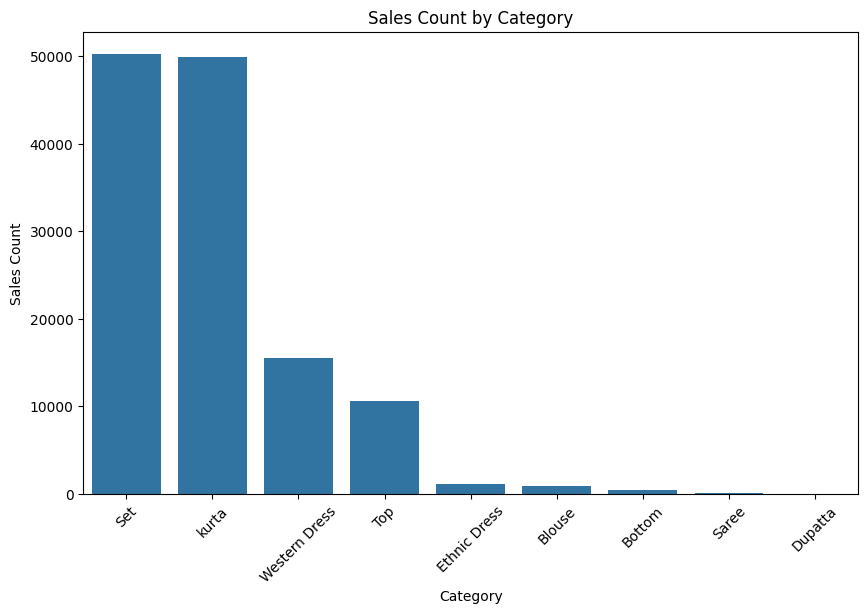

In [38]:
# Count plot for Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title("Sales Count by Category")
plt.xlabel("Category")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.show()

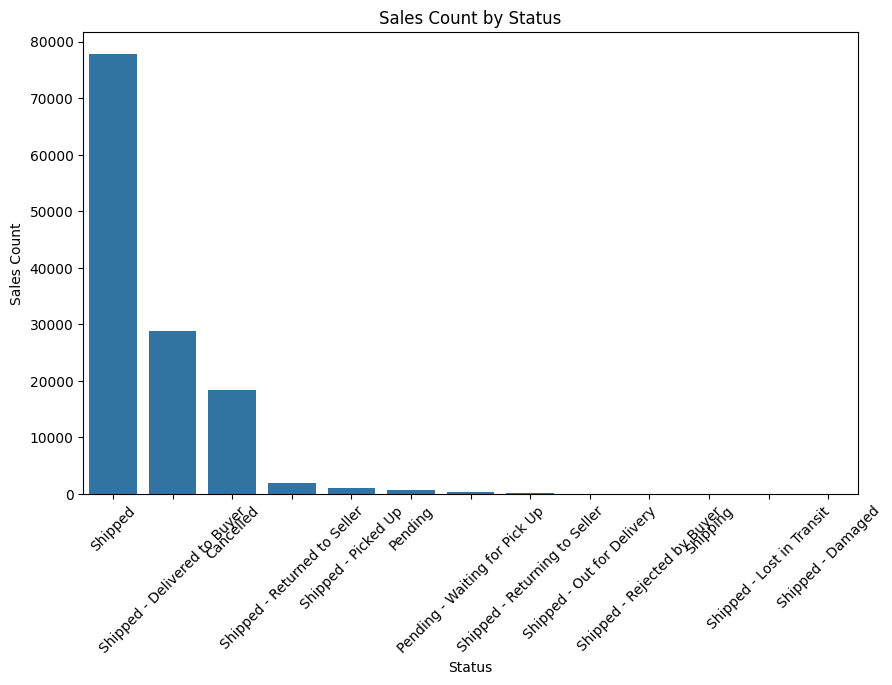

In [39]:
# Count plot for Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)
plt.title("Sales Count by Status")
plt.xlabel("Status")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.show()

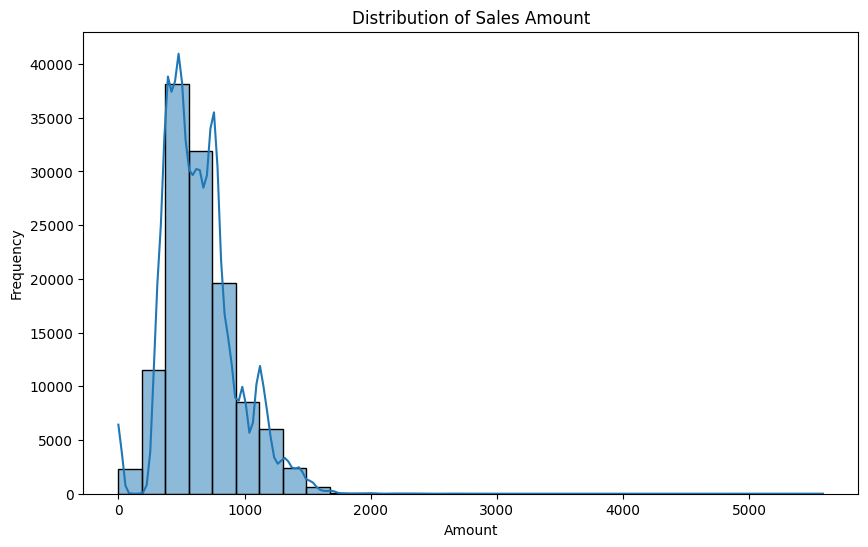

In [40]:
# Histogram for Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title("Distribution of Sales Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

**Define "Top-Selling Items"**
To identify items with consistently high sales volumes or revenue.

Approach:
* Group data by SKU, Category, or Style to calculate total sales volume (Qty) and revenue (Amount).
* Define "top-selling items" based on the highest cumulative revenue or sales volume over a specified period (e.g., top 10% of items).

In [41]:
# Aggregate data by SKU to get top-selling items
top_sellers = df.groupby('SKU').agg(total_qty=('Qty', 'sum'), total_revenue=('Amount', 'sum'))
# Define a threshold for top-sellers (e.g., top 10%)
threshold = top_sellers['total_revenue'].quantile(0.9)
top_selling_skus = top_sellers[top_sellers['total_revenue'] >= threshold].index

In [42]:
top_sellers

,total_qty,total_revenue
SKU,,
AN201-RED-M,2,458.0
AN201-RED-XL,2,602.0
AN201-RED-XXL,1,229.0
AN202-ORANGE-M,2,530.0
AN202-ORANGE-S,4,1141.0
...,...,...
SET449-KR-NP-S,1,1449.0
SET461-KR-NP-XL,1,1039.0
SET461-KR-NP-XS,1,769.0


In [78]:
# Filter dataset for top-selling items only
df_top_sellers = df[df['SKU'].isin(top_selling_skus)]
df_top_sellers

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128968,128968,403-7059995-7618722,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.00,Delhi,DELHI,110053.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


**Analyze Fulfillment and Courier Status for Top-Selling Items**
To examine the fulfillment methods and courier statuses associated with these top-selling items to identify any patterns in delivery performance.

Approach:
* Filter data for top-selling SKUs.
* Calculate the frequency of each Fulfillment and Courier Status for these items to determine common delivery outcomes.

In [79]:
# Count fulfillment methods and courier statuses for top-selling items
fulfillment_counts = df_top_sellers['Fulfilment'].value_counts()
courier_status_counts = df_top_sellers['Courier Status'].value_counts()


**Measure Future Demand Trends by Courier Status**
To investigate if fulfillment and courier performance (e.g., delays, on-time deliveries) affect future sales volumes for top-selling products.

Approach:
* Calculate the average monthly or quarterly Qty for each SKU.
* Compare trends in sales volume for products with different courier statuses, such as items that had frequent delays vs. items with consistently successful deliveries.


In [80]:
print(df_top_sellers['Date'].dtype)


object


In [81]:
# Check unique values or patterns in the Date column
print(df_top_sellers['Date'].unique())

['04-30-22' '04-29-22' '04-28-22' '04-27-22' '04-26-22' '04-25-22'
 '04-24-22' '04-23-22' '04-22-22' '04-21-22' '04-20-22' '04-19-22'
 '04-18-22' '04-17-22' '04-16-22' '04-15-22' '04-14-22' '04-13-22'
 '04-12-22' '04-11-22' '04-10-22' '04-09-22' '04-08-22' '04-07-22'
 '04-06-22' '04-05-22' '04-04-22' '04-03-22' '04-02-22' '04-01-22'
 '03-31-22' '05-31-22' '05-30-22' '05-29-22' '05-28-22' '05-27-22'
 '05-26-22' '05-25-22' '05-24-22' '05-23-22' '05-22-22' '05-21-22'
 '05-20-22' '05-19-22' '05-18-22' '05-17-22' '05-16-22' '05-15-22'
 '05-14-22' '05-13-22' '05-12-22' '05-11-22' '05-10-22' '05-09-22'
 '05-08-22' '05-07-22' '05-06-22' '05-05-22' '05-04-22' '05-03-22'
 '05-02-22' '05-01-22' '06-29-22' '06-28-22' '06-27-22' '06-26-22'
 '06-25-22' '06-24-22' '06-23-22' '06-22-22' '06-21-22' '06-20-22'
 '06-19-22' '06-18-22' '06-17-22' '06-16-22' '06-15-22' '06-14-22'
 '06-13-22' '06-12-22' '06-11-22' '06-10-22' '06-09-22' '06-08-22'
 '06-07-22' '06-06-22' '06-05-22' '06-04-22' '06-03-22' '06-02

In [82]:
# Drop rows with NaT values in 'Date' after conversion
df_top_sellers.loc[:, 'Date']= df_top_sellers.dropna(subset=['Date'])

In [83]:
print(df_top_sellers['Date'].unique())
print(df_top_sellers['Date'].dtype)

['04-30-22' '04-29-22' '04-28-22' '04-27-22' '04-26-22' '04-25-22'
 '04-24-22' '04-23-22' '04-22-22' '04-21-22' '04-20-22' '04-19-22'
 '04-18-22' '04-17-22' '04-16-22' '04-15-22' '04-14-22' '04-13-22'
 '04-12-22' '04-11-22' '04-10-22' '04-09-22' '04-08-22' '04-07-22'
 '04-06-22' '04-05-22' '04-04-22' '04-03-22' '04-02-22' '04-01-22'
 '03-31-22' '05-31-22' '05-30-22' '05-29-22' '05-28-22' '05-27-22'
 '05-26-22' '05-25-22' '05-24-22' '05-23-22' '05-22-22' '05-21-22'
 '05-20-22' '05-19-22' '05-18-22' '05-17-22' '05-16-22' '05-15-22'
 '05-14-22' '05-13-22' '05-12-22' '05-11-22' '05-10-22' '05-09-22'
 '05-08-22' '05-07-22' '05-06-22' '05-05-22' '05-04-22' '05-03-22'
 '05-02-22' '05-01-22' '06-29-22' '06-28-22' '06-27-22' '06-26-22'
 '06-25-22' '06-24-22' '06-23-22' '06-22-22' '06-21-22' '06-20-22'
 '06-19-22' '06-18-22' '06-17-22' '06-16-22' '06-15-22' '06-14-22'
 '06-13-22' '06-12-22' '06-11-22' '06-10-22' '06-09-22' '06-08-22'
 '06-07-22' '06-06-22' '06-05-22' '06-04-22' '06-03-22' '06-02

In [84]:
# Use .loc to specify the assignment, which reduces the chance of the warning
df_top_sellers.loc[:, 'Date'] = pd.to_datetime(df_top_sellers['Date'], format='%m-%d-%y', errors='coerce')

In [85]:
print(df_top_sellers['Date'].dtype)  # Should now show datetime64[ns]

object


In [86]:
df_top_sellers['Date'] = pd.to_datetime(df_top_sellers['Date'], format='%m-%d-%y', errors='coerce')

<ipython-input-86-cbcf44784d31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_sellers['Date'] = pd.to_datetime(df_top_sellers['Date'], format='%m-%d-%y', errors='coerce')


In [87]:
df_top_sellers['Month'] = df_top_sellers['Date'].dt.to_period('M')
monthly_sales = df_top_sellers.groupby(['SKU', 'Courier Status', 'Month'])['Qty'].sum().unstack(level=1).fillna(0)


<ipython-input-87-334261b7f1fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_sellers['Month'] = df_top_sellers['Date'].dt.to_period('M')


In [88]:
print(df_top_sellers['Courier Status'].unique())

['Shipped' nan 'Cancelled' 'Unshipped']


In [89]:
# Option 1: Replace NaN with a placeholder, e.g., 'Unknown'
df_top_sellers['Courier Status'] = df_top_sellers['Courier Status'].fillna('Unknown')

# Option 2: Drop rows with NaN in 'Courier Status'
df_top_sellers = df_top_sellers.dropna(subset=['Courier Status'])


<ipython-input-89-18788caf95c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_sellers['Courier Status'] = df_top_sellers['Courier Status'].fillna('Unknown')


In [90]:
df_top_sellers

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Month
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,2022-04
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,2022-04
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,2022-04
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,2022-04
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,2022-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128968,128968,403-7059995-7618722,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,824.00,Delhi,DELHI,110053.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,2022-05
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False,2022-05
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False,2022-05
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,2022-05


In [91]:
# Group by SKU, Courier Status, and Month to calculate monthly sales volume
monthly_sales = df_top_sellers.groupby(['SKU', 'Courier Status', 'Date'])['Qty'].sum().unstack(level=1).fillna(0)
df_top_sellers

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Month
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,2022-04
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,2022-04
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,2022-04
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,2022-04
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,2022-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128968,128968,403-7059995-7618722,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,824.00,Delhi,DELHI,110053.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,2022-05
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False,2022-05
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False,2022-05
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,2022-05


**Analyze Monthly Demand Trends by Courier Status**
To analyze if different courier statuses (e.g., "Shipped" vs. "Cancelled") affect future demand.

Approach:
* Calculate monthly sales volumes for each SKU based on their courier statuses.
* Observe if consistent cancellations or other statuses correlate with reduced future demand.

In [97]:
# Group and calculate monthly sales volume for each SKU and Courier Status
daily_sales = df_top_sellers.groupby(['SKU', 'Courier Status', 'Date'])['Qty'].sum().unstack(level=1).fillna(0)

# Display the resulting table
daily_sales


Courier Status                Cancelled  Shipped  Unknown  Unshipped
SKU               Date                                              
J0002-SKD-L       2022-04-01        0.0      0.0      0.0        0.0
                  2022-04-04        0.0      1.0      0.0        0.0
                  2022-04-06        0.0      1.0      0.0        0.0
                  2022-04-08        0.0      1.0      0.0        0.0
                  2022-04-11        0.0      1.0      0.0        0.0
...                                 ...      ...      ...        ...
SET436-KR-NP-XXXL 2022-06-19        0.0      1.0      0.0        0.0
                  2022-06-20        0.0      1.0      0.0        0.0
                  2022-06-23        0.0      1.0      0.0        0.0
                  2022-06-24        0.0      1.0      0.0        0.0
                  2022-06-26        0.0      1.0      0.0        0.0

[29239 rows x 4 columns]

In [98]:
# Filter only completed orders (e.g., "Shipped")
completed_orders_daily = df_top_sellers[df_top_sellers['Courier Status'] == 'Shipped']

# Group by Date and calculate total quantity for completed orders
daily_sales_volume = completed_orders_daily.groupby('Date')['Qty'].sum()


In [99]:
# Filter only unfulfilled orders (e.g., "Cancelled" and "Unshipped")
unfulfilled_orders_daily = df_top_sellers[df_top_sellers['Courier Status'].isin(['Cancelled', 'Unshipped'])]

# Group by Date and Courier Status to calculate the frequency of unfulfilled orders
daily_unfulfilled_frequency = unfulfilled_orders_daily.groupby(['Date', 'Courier Status']).size().unstack(level=1).fillna(0)


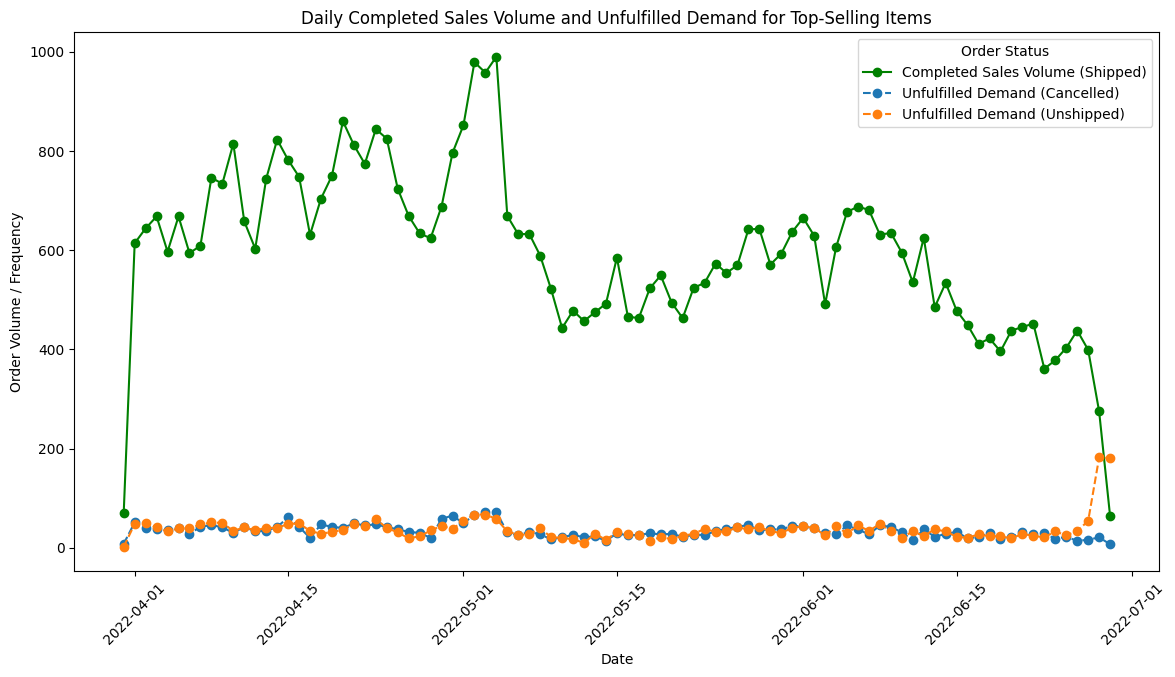

In [100]:
plt.figure(figsize=(14, 7))

# Plot completed sales volume (Shipped)
plt.plot(daily_sales_volume.index, daily_sales_volume, marker='o', color='green', label='Completed Sales Volume (Shipped)')

# Plot unfulfilled demand (Cancelled and Unshipped) on the same plot for comparison
for status in daily_unfulfilled_frequency.columns:
    plt.plot(daily_unfulfilled_frequency.index, daily_unfulfilled_frequency[status], marker='o', linestyle='--', label=f'Unfulfilled Demand ({status})')

plt.title("Daily Completed Sales Volume and Unfulfilled Demand for Top-Selling Items")
plt.xlabel("Date")
plt.ylabel("Order Volume / Frequency")
plt.legend(title="Order Status")
plt.xticks(rotation=45)
plt.show()


**Compare Demand Trends for Different Fulfillment Methods**
To assess if different fulfillment methods have unique impacts on future demand, especially if associated with particular courier statuses.
Approach: Group data by both "Fulfillment" and "Courier Status" to calculate monthly demand for each combination.

Approach:
* To analyze how fulfillment methods (e.g., FBA or third-party logistics) impact demand trends. Combine this with courier statuses to observe if certain fulfillment methods experience more cancellations or delays, which could influence customer satisfaction.

In [102]:
# Group by Fulfillment, Courier Status, and Date to calculate daily demand for each combination
daily_fulfillment_status = df_top_sellers.groupby(['Fulfilment', 'Courier Status', 'Date'])['Qty'].sum().unstack(level=1).fillna(0)
# Display the resulting table
daily_fulfillment_status.head()


Courier Status         Cancelled  Shipped  Unknown  Unshipped
Fulfilment Date                                              
Amazon     2022-03-31        0.0     62.0      0.0        2.0
           2022-04-01        0.0    483.0      0.0       48.0
           2022-04-02        0.0    506.0      0.0       50.0
           2022-04-03        0.0    504.0      0.0       41.0
           2022-04-04        0.0    438.0      0.0       33.0

To get a clear view, we’ll create separate line plots for each fulfillment method, showing trends for "Shipped," "Cancelled," and "Unshipped" statuses within each method. This will allow us to compare how different fulfillment methods handle demand and if certain methods experience more cancellations.

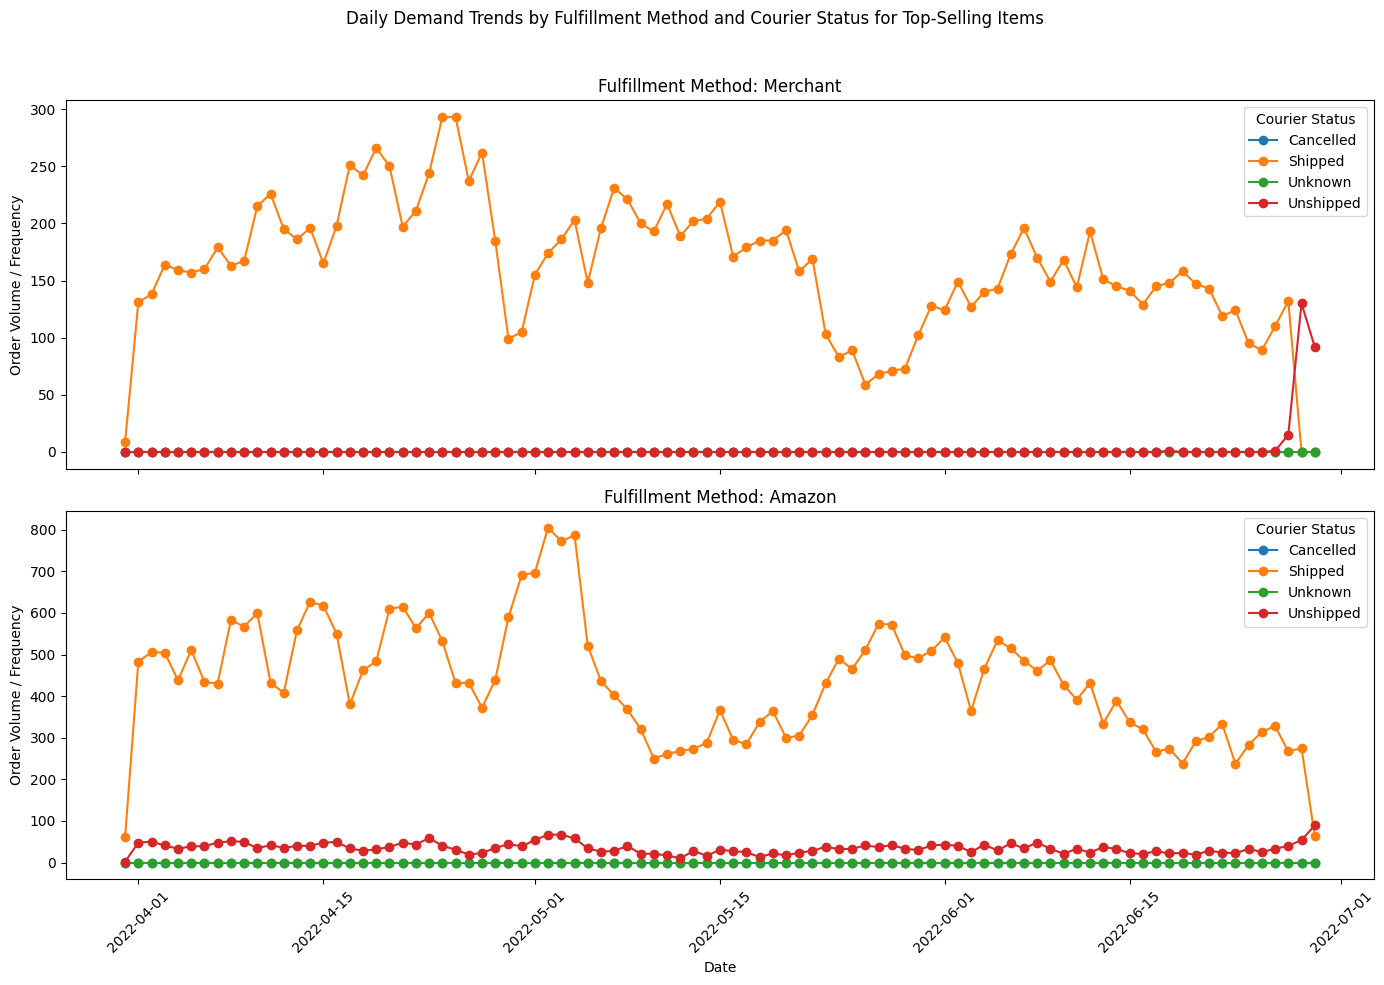

In [104]:
# List of unique fulfillment methods
fulfillment_methods = df_top_sellers['Fulfilment'].unique()

# Plot each fulfillment method in separate subplots
fig, axes = plt.subplots(nrows=len(fulfillment_methods), figsize=(14, 10), sharex=True)
fig.suptitle("Daily Demand Trends by Fulfillment Method and Courier Status for Top-Selling Items")

for i, method in enumerate(fulfillment_methods):
    # Select data for the specific fulfillment method
    method_data = daily_fulfillment_status.loc[method]

    # Plot each courier status within the fulfillment method
    for status in method_data.columns:
        axes[i].plot(method_data.index, method_data[status], marker='o', label=f"{status}")

    # Set plot titles and labels
    axes[i].set_title(f"Fulfillment Method: {method}")
    axes[i].set_ylabel("Order Volume / Frequency")
    axes[i].legend(title="Courier Status")

# Set x-axis label for the entire figure
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [109]:
# Group by Fulfillment, Courier Status, and Month to calculate monthly demand
monthly_fulfillment_status = df_top_sellers.groupby(['Fulfilment', 'Courier Status', 'Month'])['Qty'].sum().unstack(level=1).fillna(0)
# Display the resulting table
monthly_fulfillment_status.head()

Courier Status      Cancelled  Shipped  Unknown  Unshipped
Fulfilment Month                                          
Amazon     2022-03        0.0     62.0      0.0        2.0
           2022-04        0.0  15448.0      0.0     1199.0
           2022-05        0.0  13597.0      0.0     1001.0
           2022-06        0.0  10434.0      0.0      971.0
Merchant   2022-03        0.0      9.0      0.0        0.0

### **Demand Forecasting**
Forecasting future demand is essential for effective inventory and fulfillment planning. By analyzing past sales data, we can anticipate demand trends for top-selling items, helping to optimize resources and improve customer satisfaction.

In this analysis, we use Prophet, a powerful time series forecasting model, to project future demand based on completed sales (orders marked as "Shipped"). Prophet’s ability to handle seasonality and trends makes it ideal for identifying patterns in daily demand. This forecast will provide insights into expected sales volumes over the next 30 days, enabling better preparation for high-demand periods and reducing the risk of stockouts.

In [110]:
# Filter data to include only 'Shipped' orders
shipped_orders = df_top_sellers[df_top_sellers['Courier Status'] == 'Shipped']

# Aggregate daily completed sales volume
daily_demand = shipped_orders.groupby('Date')['Qty'].sum()

# Alternatively, for monthly aggregation
monthly_demand = shipped_orders.groupby(shipped_orders['Date'].dt.to_period('M'))['Qty'].sum()

In [112]:
from prophet import Prophet

# Prepare data for Prophet
# Ensure Date is named 'ds' and Quantity is named 'y'
demand_data = daily_demand.reset_index()
demand_data.columns = ['ds', 'y']

In [113]:
# Initialize the model
model = Prophet()

# Fit the model on historical demand data
model.fit(demand_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7xzni8l/on9jrqnn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7xzni8l/1kxwjo6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45129', 'data', 'file=/tmp/tmpf7xzni8l/on9jrqnn.json', 'init=/tmp/tmpf7xzni8l/1kxwjo6a.json', 'output', 'file=/tmp/tmpf7xzni8l/prophet_modelfp_43gyl/prophet_model-20241102035846.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:58:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:58:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [114]:
# Create a DataFrame for future dates
future_dates = model.make_future_dataframe(periods=30)  # Forecasting 30 days into the future

# Generate the forecast
forecast = model.predict(future_dates)

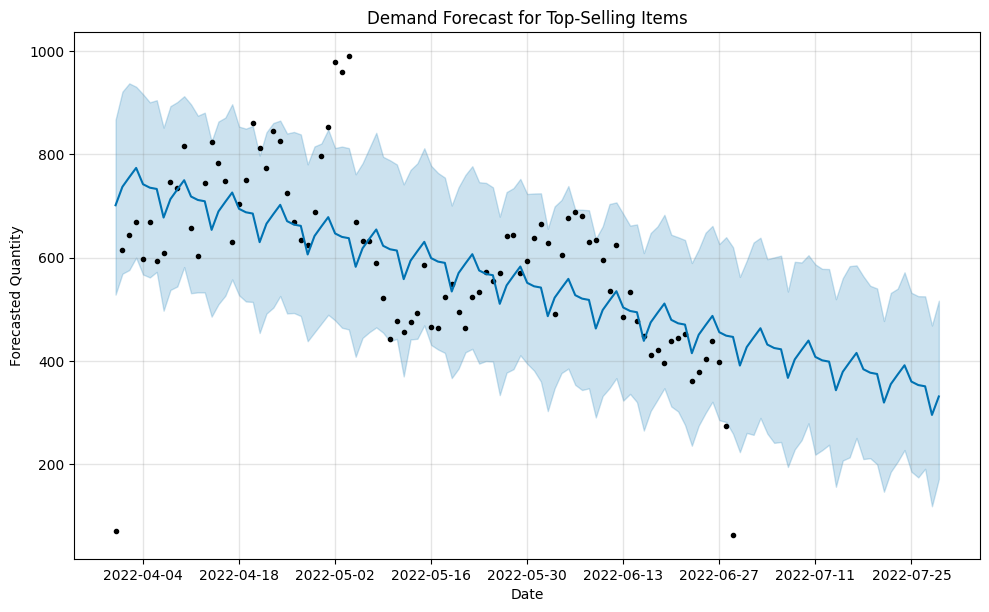

In [116]:
# Plot the forecast
model.plot(forecast)
plt.title("Demand Forecast for Top-Selling Items")
plt.xlabel("Date")
plt.ylabel("Forecasted Quantity")
plt.show()

### Demand Forecast Summary

The SARIMA forecast indicates a gradual decline in daily demand for top-selling items, suggesting a potential seasonal dip. Historical data aligns well with the initial forecast, enhancing model credibility. The confidence interval widens over time, reflecting increased uncertainty in longer-term predictions. This trend suggests that inventory and fulfillment operations could be adjusted accordingly. Regular updates with new data are recommended to refine accuracy and respond to any unexpected demand shifts.